# **Library**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import os
import seaborn as sns

# **하이닉스**

In [2]:
DATA_2017 = pd.read_excel("./data/2017년 주가 기본 데이터.xlsx")
DATA_2018 = pd.read_excel("./data/2018년 주가 기본 데이터.xlsx")
DATA_2019 = pd.read_excel("./data/2019년 주가 기본 데이터.xlsx")

# 하이닉스
data_2017 = DATA_2017[DATA_2017["code"] == "000660"]
data_2018 = DATA_2018[DATA_2018["code"] == "000660"]
data_2019 = DATA_2019[DATA_2019["code"] == "000660"]

# CONCAT
SKHYNIX = pd.concat([data_2017,data_2018,data_2019])
SKHYNIX.to_csv("./data/SKHYNIX.csv", header=True)

# **Kyungdong Dataset**

In [3]:
Kyungdong = pd.read_csv("./data/SKHYNIX.csv")
Kyungdong = Kyungdong[Kyungdong.columns[2:-1]]

# **Date**

In [4]:
Kyungdong["date"] = pd.to_datetime(Kyungdong["date"])
Kyungdong = Kyungdong.set_index("date")

# **Data head**

In [5]:
Kyungdong.head(10)

,open,high,low,close,trading_volume,trading_value
date,,,,,,
2017-01-02,44750,46000,44600,45800,1547681,70741238750
2017-01-03,46200,47300,46200,47250,2655477,124284065200
2017-01-04,47000,47150,46200,46500,2722599,127044173970
2017-01-05,47000,47500,46850,46950,2377163,112240246450
2017-01-06,47700,48450,47600,48000,3166843,152264047270
2017-01-09,48500,49750,48200,49550,3871999,191236382800
2017-01-10,49850,50200,49200,49750,2561968,127213145450
2017-01-11,50000,51900,50000,51600,4360058,223583642680
2017-01-12,51600,51600,50400,50600,5060622,256710131000


#  **Train Test Split**

In [6]:
Kyungdong = pd.read_csv("./data/SKHYNIX.csv")
Kyungdong = Kyungdong[Kyungdong.columns[2:-1]]

In [7]:
Kyungdong["date"] = pd.to_datetime(Kyungdong["date"])
Kyungdong = Kyungdong.set_index("date")

In [8]:
split_date = pd.Timestamp("2019-09-30")
train = Kyungdong.loc[:split_date, ["open", "high", "low", "close"]]
test = Kyungdong.loc[split_date:, ["open", "high", "low", "close"]]

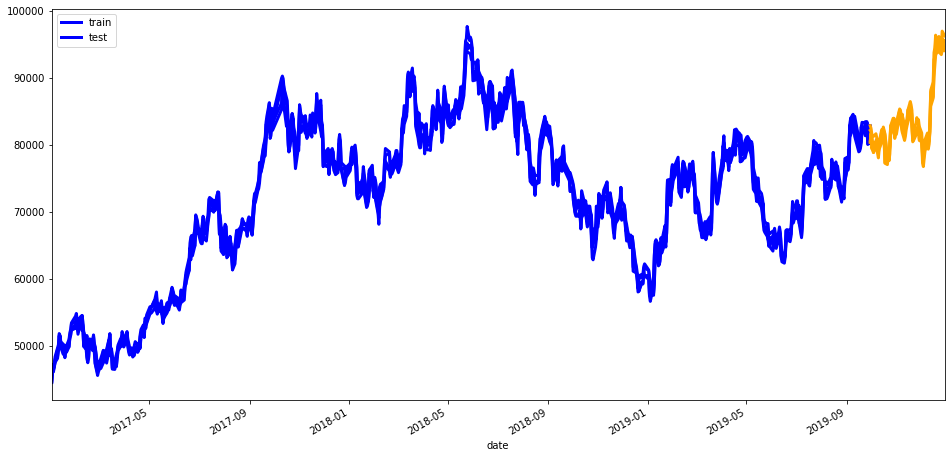

In [9]:
ax = train.plot(figsize=(16,8), color='b', linewidth=3)
test.plot(ax=ax, color='orange', linewidth=3)
plt.legend(['train', 'test'])
plt.show()

# **Data MinMaxSacling**

In [10]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
train_sc = sc.fit_transform(train)
test_sc = sc.transform(test)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


# **Transform to Pandas DataFrame**

In [11]:
train_sc_df = pd.DataFrame(train_sc, columns=["open", "high", "low", "close"], index=train.index)
test_sc_df = pd.DataFrame(test_sc, columns=["open", "high", "low", "close"], index=test.index)

# **train_sc_df**

In [12]:
train_sc_df

,open,high,low,close
date,,,,
2017-01-02,0.000000,0.000000,0.000,0.000000
2017-01-03,0.028684,0.025145,0.032,0.029293
2017-01-04,0.044510,0.022244,0.032,0.014141
2017-01-05,0.044510,0.029014,0.045,0.023232
2017-01-06,0.058358,0.047389,0.060,0.044444
...,...,...,...,...
2019-09-24,0.746785,0.725338,0.736,0.759596
2019-09-25,0.740851,0.711799,0.738,0.729293
2019-09-26,0.756677,0.725338,0.758,0.757576


# **Setting for Sliding Window**

In [13]:
# List
columns = ["open", "high", "low", "close"]

for col in columns : 
    for s in range(1, 13):
        train_sc_df['{} shift_-{}'.format(col,s)] = train_sc_df[col].shift(s)
        test_sc_df['{} shift_-{}'.format(col,s)] = test_sc_df[col].shift(s)
train_sc_df.head(13)

,open,high,low,close,open shift_-1,open shift_-2,open shift_-3,open shift_-4,open shift_-5,open shift_-6,...,close shift_-3,close shift_-4,close shift_-5,close shift_-6,close shift_-7,close shift_-8,close shift_-9,close shift_-10,close shift_-11,close shift_-12
date,,,,,,,,,,,,,,,,,,,,,
2017-01-02,0.000000,0.000000,0.000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-03,0.028684,0.025145,0.032,0.029293,0.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-04,0.044510,0.022244,0.032,0.014141,0.028684,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-05,0.044510,0.029014,0.045,0.023232,0.044510,0.028684,0.000000,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-06,0.058358,0.047389,0.060,0.044444,0.044510,0.044510,0.028684,0.000000,NaN,NaN,...,0.029293,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-09,0.074184,0.072534,0.072,0.075758,0.058358,0.044510,0.044510,0.028684,0.000000,NaN,...,0.014141,0.029293,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-10,0.100890,0.081238,0.092,0.079798,0.074184,0.058358,0.044510,0.044510,0.028684,0.000000,...,0.023232,0.014141,0.029293,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-11,0.103858,0.114120,0.108,0.117172,0.100890,0.074184,0.058358,0.044510,0.044510,0.028684,...,0.044444,0.023232,0.014141,0.029293,0.000000,NaN,NaN,NaN,NaN,NaN
2017-01-12,0.135509,0.108317,0.116,0.096970,0.103858,0.100890,0.074184,0.058358,0.044510,0.044510,...,0.075758,0.044444,0.023232,0.014141,0.029293,0.000000,NaN,NaN,NaN,NaN


# **NaN Omit**

In [14]:
X_train = train_sc_df.dropna().drop(["open", "high", "low", "close"], axis=1)
y_train = train_sc_df.dropna()[["open", "high", "low", "close"]]["close"]

In [15]:
X_test = test_sc_df.dropna().drop(["open", "high", "low", "close"], axis=1)
y_test = test_sc_df.dropna()[["open", "high", "low", "close"]]["close"]

# **Final Train & Test**

In [16]:
X_train.head()

,open shift_-1,open shift_-2,open shift_-3,open shift_-4,open shift_-5,open shift_-6,open shift_-7,open shift_-8,open shift_-9,open shift_-10,...,close shift_-3,close shift_-4,close shift_-5,close shift_-6,close shift_-7,close shift_-8,close shift_-9,close shift_-10,close shift_-11,close shift_-12
date,,,,,,,,,,,,,,,,,,,,,
2017-01-18,0.090010,0.105836,0.100890,0.135509,0.103858,0.100890,0.074184,0.058358,0.044510,0.044510,...,0.090909,0.096970,0.117172,0.079798,0.075758,0.044444,0.023232,0.014141,0.029293,0.000000
2017-01-19,0.083086,0.090010,0.105836,0.100890,0.135509,0.103858,0.100890,0.074184,0.058358,0.044510,...,0.070707,0.090909,0.096970,0.117172,0.079798,0.075758,0.044444,0.023232,0.014141,0.029293
2017-01-20,0.094955,0.083086,0.090010,0.105836,0.100890,0.135509,0.103858,0.100890,0.074184,0.058358,...,0.070707,0.070707,0.090909,0.096970,0.117172,0.079798,0.075758,0.044444,0.023232,0.014141
2017-01-23,0.097923,0.094955,0.083086,0.090010,0.105836,0.100890,0.135509,0.103858,0.100890,0.074184,...,0.061616,0.070707,0.070707,0.090909,0.096970,0.117172,0.079798,0.075758,0.044444,0.023232
2017-01-24,0.102868,0.097923,0.094955,0.083086,0.090010,0.105836,0.100890,0.135509,0.103858,0.100890,...,0.076768,0.061616,0.070707,0.070707,0.090909,0.096970,0.117172,0.079798,0.075758,0.044444


In [17]:
y_train.head()

date
2017-01-18    0.061616
2017-01-19    0.076768
2017-01-20    0.067677
2017-01-23    0.101010
2017-01-24    0.117172
Name: close, dtype: float64

In [18]:
X_test.head()

,open shift_-1,open shift_-2,open shift_-3,open shift_-4,open shift_-5,open shift_-6,open shift_-7,open shift_-8,open shift_-9,open shift_-10,...,close shift_-3,close shift_-4,close shift_-5,close shift_-6,close shift_-7,close shift_-8,close shift_-9,close shift_-10,close shift_-11,close shift_-12
date,,,,,,,,,,,,,,,,,,,,,
2019-10-18,0.736894,0.744807,0.711177,0.736894,0.693373,0.675569,0.705242,0.711177,0.675569,0.728981,...,0.715152,0.701010,0.690909,0.670707,0.709091,0.696970,0.696970,0.680808,0.731313,0.735354
2019-10-21,0.727003,0.736894,0.744807,0.711177,0.736894,0.693373,0.675569,0.705242,0.711177,0.675569,...,0.739394,0.715152,0.701010,0.690909,0.670707,0.709091,0.696970,0.696970,0.680808,0.731313
2019-10-22,0.653808,0.727003,0.736894,0.744807,0.711177,0.736894,0.693373,0.675569,0.705242,0.711177,...,0.711111,0.739394,0.715152,0.701010,0.690909,0.670707,0.709091,0.696970,0.696970,0.680808
2019-10-23,0.675569,0.653808,0.727003,0.736894,0.744807,0.711177,0.736894,0.693373,0.675569,0.705242,...,0.638384,0.711111,0.739394,0.715152,0.701010,0.690909,0.670707,0.709091,0.696970,0.696970
2019-10-24,0.667656,0.675569,0.653808,0.727003,0.736894,0.744807,0.711177,0.736894,0.693373,0.675569,...,0.640404,0.638384,0.711111,0.739394,0.715152,0.701010,0.690909,0.670707,0.709091,0.696970


In [19]:
y_test.head()

date
2019-10-18    0.638384
2019-10-21    0.640404
2019-10-22    0.672727
2019-10-23    0.644444
2019-10-24    0.690909
Name: close, dtype: float64

# **ndarray to Tranform**

In [20]:
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

# **Final Training Set & Test Set's X**

In [21]:
X_train_t = X_train.reshape(X_train.shape[0], 48, 1)
X_test_t = X_test.reshape(X_test.shape[0], 48, 1)

# **LSTM Model**

In [22]:
from keras.layers import LSTM 
from keras.models import Sequential 
from keras.layers import Dense 
import keras.backend as K
from keras.callbacks import EarlyStopping
from keras.layers import Dense, Dropout, Activation
K.clear_session() 
model = Sequential() # Sequeatial Model 
model.add(LSTM(20, input_shape=(48,1))) # (timestep, feature) 
model.add(Dense(1)) # output = 1 
model.compile(loss='mean_squared_error', optimizer='adam') 
model.summary()

Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 20)                1760      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 21        
Total params: 1,781
Trainable params: 1,781
Non-trainable params: 0
_________________________________________________________________


# **Model Fitting**

In [23]:
early_stop = EarlyStopping(monitor='loss', patience=10, verbose=1)
model.fit(X_train_t, y_train, epochs=150, batch_size=30, verbose=1, callbacks=[early_stop])

Epoch 1/150
659/659 [==============================] - 1s 2ms/step - loss: 0.4648
Epoch 2/150
659/659 [==============================] - 1s 781us/step - loss: 0.1494
Epoch 3/150
659/659 [==============================] - 1s 775us/step - loss: 0.0202
Epoch 4/150
659/659 [==============================] - 1s 795us/step - loss: 0.0146
Epoch 5/150
659/659 [==============================] - 1s 784us/step - loss: 0.0106
Epoch 6/150
659/659 [==============================] - 1s 785us/step - loss: 0.0082
Epoch 7/150
659/659 [==============================] - 1s 795us/step - loss: 0.0069
Epoch 8/150
659/659 [==============================] - 1s 828us/step - loss: 0.0062
Epoch 9/150
659/659 [==============================] - 1s 787us/step - loss: 0.0060
Epoch 10/150
659/659 [==============================] - 1s 785us/step - loss: 0.0057
Epoch 11/150
659/659 [==============================] - 1s 784us/step - loss: 0.0057
Epoch 12/150
659/659 [==============================] - 1s 875us/step - loss

Epoch 97/150
659/659 [==============================] - 1s 967us/step - loss: 0.0027
Epoch 98/150
659/659 [==============================] - 1s 952us/step - loss: 0.0027
Epoch 99/150
659/659 [==============================] - 1s 916us/step - loss: 0.0026
Epoch 100/150
659/659 [==============================] - 1s 902us/step - loss: 0.0025
Epoch 101/150
659/659 [==============================] - 1s 908us/step - loss: 0.0027
Epoch 102/150
659/659 [==============================] - 1s 904us/step - loss: 0.0026
Epoch 103/150
659/659 [==============================] - 1s 911us/step - loss: 0.0026
Epoch 104/150
659/659 [==============================] - 1s 907us/step - loss: 0.0025
Epoch 105/150
659/659 [==============================] - 1s 908us/step - loss: 0.0025
Epoch 106/150
659/659 [==============================] - 1s 900us/step - loss: 0.0025
Epoch 107/150
659/659 [==============================] - 1s 923us/step - loss: 0.0025
Epoch 108/150
659/659 [==============================] - 

# **Train Prediction**

In [24]:
# Pred
y_pred = model.predict(X_train_t)
PRED = pd.DataFrame(y_pred)
PRED.columns = ["PRED"]

In [25]:
# Actual
REAL = pd.DataFrame(y_train)
REAL.columns = ["REAL"]

In [26]:
# Setting
RESULT = pd.concat([REAL,PRED], axis=1)
RESULT["date"] = train.index[12:]

In [27]:
# Set Index
RESULT = RESULT.set_index("date")

In [28]:
y_pred = model.predict(X_train_t)
y_pred = y_pred * (np.max(train["close"]) -  np.min(train["close"])) +  np.min(train["close"])
y_pred_df = pd.DataFrame(y_pred, columns=['prediction'], index=train.index[:-12])

In [29]:
y_train = y_train * (np.max(train["close"]) -  np.min(train["close"])) +  np.min(train["close"])
y_train_df = pd.DataFrame(y_train, columns=['actual_price'], index=train.index[:-12])

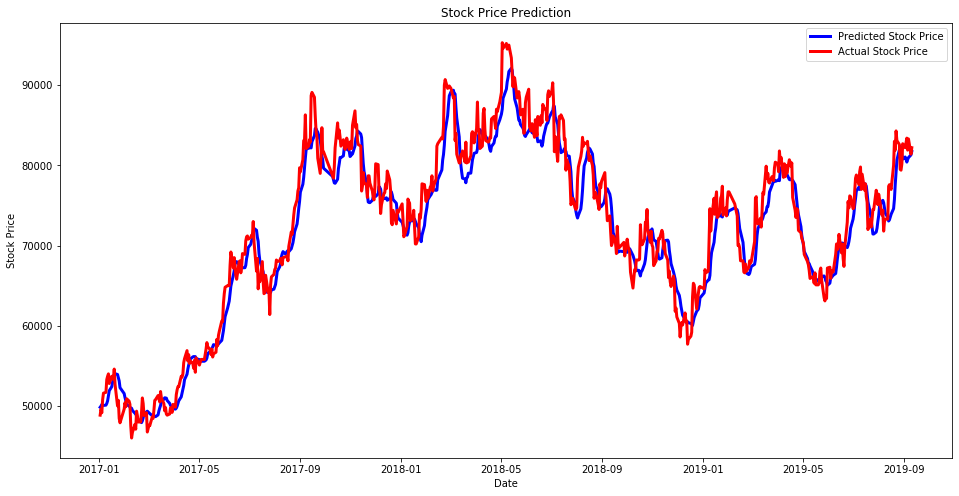

In [30]:
# plotting the results
fig = plt.figure(figsize=(16,8))
fig.patch.set_facecolor('xkcd:white')
plt.plot(y_pred_df["prediction"], color = 'blue', label = 'Predicted Stock Price', linewidth = 3)
plt.plot(y_train_df["actual_price"], color = 'red', label = 'Actual Stock Price', linewidth = 3)
plt.title('Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# **Test Prediction**

In [31]:
# Pred
y_pred = model.predict(X_test_t)
PRED = pd.DataFrame(y_pred)
PRED.columns = ["PRED"]

In [32]:
# Actual
REAL = pd.DataFrame(y_test)
REAL.columns = ["REAL"]

In [33]:
RESULT_TEST = pd.concat([REAL,PRED], axis=1)
RESULT_TEST["date"] = test.index[12:]

In [34]:
RESULT_TEST = RESULT_TEST.set_index("date")

# **Test Visualization**

In [35]:
y_pred = model.predict(X_test_t)
y_pred = y_pred * (np.max(test["close"]) -  np.min(test["close"])) +  np.min(test["close"])
y_pred_df = pd.DataFrame(y_pred, columns=['prediction'], index=test.index[12:])

In [36]:
y_test = y_test * (np.max(test["close"]) -  np.min(test["close"])) +  np.min(test["close"])
y_test_df = pd.DataFrame(y_test, columns=['actual_price'], index=test.index[12:])

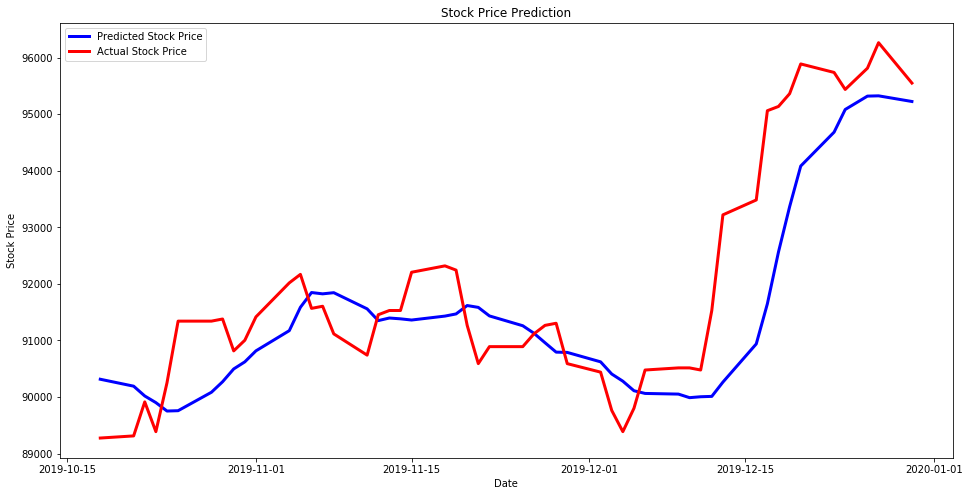

In [37]:
# plotting the results
fig = plt.figure(figsize=(16,8))
fig.patch.set_facecolor('xkcd:white')
plt.plot(y_pred_df["prediction"], color = 'blue', label = 'Predicted Stock Price', linewidth = 3)
plt.plot(y_test_df["actual_price"], color = 'red', label = 'Actual Stock Price', linewidth = 3)
plt.title('Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# **RMSE**

In [38]:
forecast_error = y_test.reshape(-1,1) - y_pred
SS, RMSE = 0, 0
for i in forecast_error : 
    SS = SS + i * i
    RMSE = SS / len(forecast_error)
print("Test DataSet's RMSE : {}" .format(float(RMSE**0.5)))

Test DataSet's RMSE : 1107.1313420829965
